In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/zahranusrat/lifestyle-and-health-risk-prediction-dataset
df=pd.read_csv("Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")

In [3]:
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [5]:
import sqlite3
import  os 

In [6]:
db_name = "Health_Risk.db"

In [7]:
def create_database():
    if os.path.exists(db_name):
        os.remove(db_name)

    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    return conn, cursor

In [8]:
conn, cursor = create_database()
print(conn, cursor)

<sqlite3.Connection object at 0x141a925c0> <sqlite3.Cursor object at 0x141b0b940>


In [9]:
if conn:
    cursor.execute('''
    CREATE TABLE Predictors (
        id INTEGER PRIMARY KEY,
        age INTEGER,
        weight INTEGER,
        height INTEGER,
        exercise VARCHAR,
        sleep REAL,
        sugar_intake VARCHAR,
        smoking VARCHAR,
        alcohol VARCHAR,
        married VARCHAR,
        profession VARCHAR,
        bmi REAL)
    ''')

    cursor.execute('''
    CREATE TABLE Target (
        id INTEGER PRIMARY KEY,
        health_risk VARCHAR)
       ''')
    
    cursor.execute('''
    CREATE TABLE Predicts (
        id INTEGER PRIMARY KEY,
        predict VARCHAR)
        ''')

In [10]:
df_predictors=df.drop("health_risk", axis=1)
df_predictors.insert(0, 'id', df.index)
df_target=df["health_risk"].to_frame()
df_target.insert(0, 'id', df.index)
try:
    df_predictors.to_sql('Predictors', conn, if_exists='append', index=False)
    print(f"✅ Success: {len(df_predictors)} rows added Predictors Table")

    df_target.to_sql('Target', conn, if_exists='append', index=False)
    print(f"✅ Success: {len(df_target)} rows added Target Table")

    conn.commit()
    print("Success Commit")

except Exception as e:
    print(f"❌ Error:{e}")
    conn.rollback()

finally:
    if conn:
        conn.close()

✅ Success: 5000 rows added Predictors Table
✅ Success: 5000 rows added Target Table
Success Commit


In [11]:

try:
    #Connection Database
    conn = sqlite3.connect(db_name)
    print(f"✅ {db_name}: database connected")

    # Get Data From Predictors Table
    query_predictors = "SELECT * FROM Predictors"
    df_predictors = pd.read_sql(query_predictors, conn)
    print(f"Predictors Rows: {len(df_predictors)}")
    

    # Get Data From Target Table
    query_target = "SELECT * FROM Target"
    df_target = pd.read_sql(query_target, conn)
    print(f"Target Rows: {len(df_target)}")

    #  Predictors and Target Tables merged by IDs.
    df_sql = pd.merge(df_predictors, df_target, on='id', how='inner')


except sqlite3.Error as e:
    print(f"❌ Error {e}")
except FileNotFoundError:
     print(f"❌ Error: The {db_name} file not found.")
finally:
    # Close connection database
    if 'conn' in locals() and conn:
        conn.close()
        print("\nClosed Connection")

✅ Health_Risk.db: database connected
Predictors Rows: 5000
Target Rows: 5000

Closed Connection


In [12]:
#EDA

In [13]:
df_predictors.head()

,id,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
0,0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6
1,1,69,76,170,high,6.9,high,no,no,no,teacher,26.3
2,2,46,106,153,high,6.6,low,yes,no,no,artist,45.3
3,3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6
4,4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8


In [14]:
df_target.head()

,id,health_risk
0,0,high
1,1,high
2,2,high
3,3,low
4,4,high


In [15]:
df_sql.columns

Index(['id', 'age', 'weight', 'height', 'exercise', 'sleep', 'sugar_intake',
       'smoking', 'alcohol', 'married', 'profession', 'bmi', 'health_risk'],
      dtype='object')

In [16]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   age           5000 non-null   int64  
 2   weight        5000 non-null   int64  
 3   height        5000 non-null   int64  
 4   exercise      5000 non-null   object 
 5   sleep         5000 non-null   float64
 6   sugar_intake  5000 non-null   object 
 7   smoking       5000 non-null   object 
 8   alcohol       5000 non-null   object 
 9   married       5000 non-null   object 
 10  profession    5000 non-null   object 
 11  bmi           5000 non-null   float64
 12  health_risk   5000 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 507.9+ KB


In [17]:
df_sql["profession"].value_counts()

profession
student          644
farmer           639
driver           631
doctor           630
artist           626
engineer         616
teacher          612
office_worker    602
Name: count, dtype: int64

In [18]:
df_sql.isnull().sum()

id              0
age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64

In [19]:
df_sql.drop_duplicates(inplace=True)

In [20]:
df_sql.describe()

,id,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2499.500000,48.805600,77.359200,171.933200,6.997060,26.84388
std,1443.520003,17.906991,18.714567,15.822225,1.432849,8.25249
min,0.000000,18.000000,45.000000,145.000000,3.000000,11.40000
25%,1249.750000,34.000000,61.000000,158.000000,6.000000,20.30000
50%,2499.500000,49.000000,77.000000,171.500000,7.000000,26.00000
75%,3749.250000,64.000000,94.000000,186.000000,8.000000,32.40000
max,4999.000000,79.000000,109.000000,199.000000,10.000000,51.40000


In [21]:
df_sql["profession"].value_counts()

profession
student          644
farmer           639
driver           631
doctor           630
artist           626
engineer         616
teacher          612
office_worker    602
Name: count, dtype: int64

In [22]:
cols=['age', 'weight', 'height', 'exercise', 'sleep', 'sugar_intake',
       'smoking', 'alcohol', 'married', 'profession', 'bmi', 'health_risk']

for col in cols:
    print(df_sql[col].value_counts())
    

age
77    102
52    101
66     99
79     95
64     95
     ... 
65     63
44     62
24     60
48     59
60     58
Name: count, Length: 62, dtype: int64
weight
98     98
102    98
61     96
103    90
70     90
       ..
78     64
52     63
58     60
51     59
49     53
Name: count, Length: 65, dtype: int64
height
157    119
160    113
192    111
188    109
161    108
170    105
197    102
167    101
152     99
163     99
158     98
173     98
191     96
168     96
166     95
146     94
177     94
196     94
150     93
180     93
171     93
181     93
195     92
198     92
151     92
189     91
185     91
165     91
172     90
183     89
182     89
148     89
147     89
186     89
194     89
154     88
162     88
159     87
187     87
184     87
156     86
149     86
175     85
179     85
164     83
153     82
199     82
169     81
174     81
145     80
176     80
190     72
178     71
193     68
155     65
Name: count, dtype: int64
exercise
medium    1985
low       1272
high      1000
n

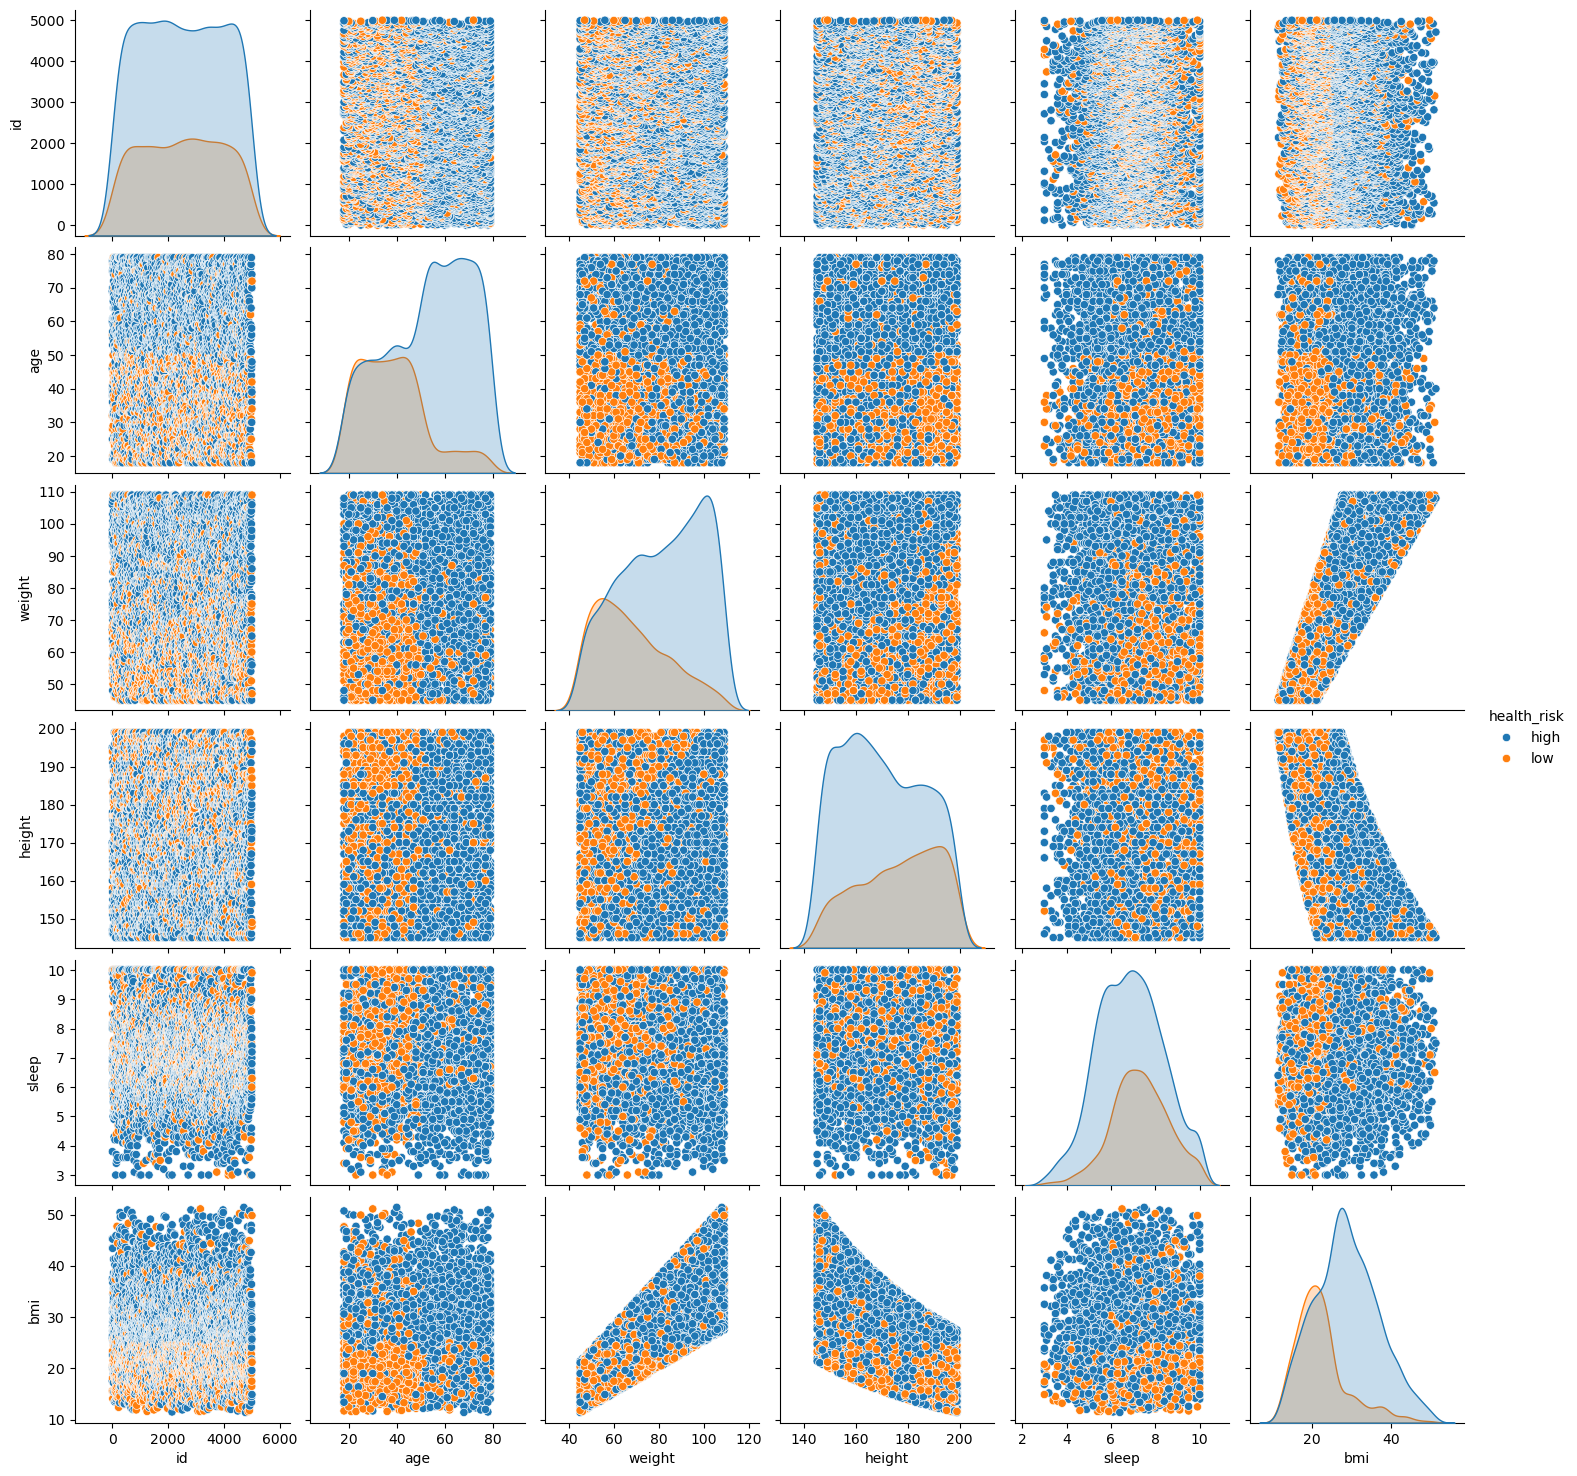

In [23]:
sns.pairplot(df_sql, hue="health_risk")
plt.show()

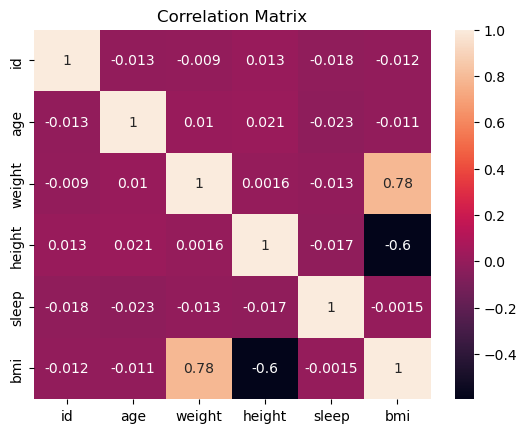

In [24]:
sns.heatmap(df_sql.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [25]:
# Feature Engineering

In [26]:
X= df_sql.drop("health_risk", axis=1)
y=df_sql["health_risk"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [29]:
X_train.head()

,id,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
4016,4016,39,48,150,high,5.1,medium,no,no,yes,engineer,21.3
569,569,61,104,151,high,4.0,high,no,no,no,teacher,45.6
460,460,61,106,151,low,8.5,medium,yes,no,no,farmer,46.5
2077,2077,70,69,172,medium,7.6,high,no,yes,yes,farmer,23.3
1727,1727,38,61,178,medium,8.5,medium,no,yes,no,doctor,19.3


In [30]:
#Encoders

In [31]:
#Binary Encoding for "health_risk" column
y_values = {'low': 0, 'high': 1} 
y_train_encoded = y_train.map(y_values)
y_test_encoded = y_test.map(y_values)

In [32]:
#Ordinal(Label) Encoding for "exercise" and "sugar_intake" columns
ordinal_cols = {
    'exercise': {'none': 0, 'low': 1, 'medium': 2, 'high': 3},
    'sugar_intake': {'low': 0, 'medium': 1, 'high': 2}
}

for col, mapping in ordinal_cols.items():
    X_train[col] = X_train[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)

In [33]:
X_train.head()

,id,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
4016,4016,39,48,150,3,5.1,1,no,no,yes,engineer,21.3
569,569,61,104,151,3,4.0,2,no,no,no,teacher,45.6
460,460,61,106,151,1,8.5,1,yes,no,no,farmer,46.5
2077,2077,70,69,172,2,7.6,2,no,yes,yes,farmer,23.3
1727,1727,38,61,178,2,8.5,1,no,yes,no,doctor,19.3


In [34]:
#Binary Encoding for "smoking", "alcohol" and "married" columns
binary_cols = ['smoking', 'alcohol', 'married']
binary_mapping = {'yes': 1, 'no': 0}
for col in binary_cols:
    X_train[col] = X_train[col].map(binary_mapping)
    X_test[col] = X_test[col].map(binary_mapping)

In [35]:
X_train.head()

,id,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
4016,4016,39,48,150,3,5.1,1,0,0,1,engineer,21.3
569,569,61,104,151,3,4.0,2,0,0,0,teacher,45.6
460,460,61,106,151,1,8.5,1,1,0,0,farmer,46.5
2077,2077,70,69,172,2,7.6,2,0,1,1,farmer,23.3
1727,1727,38,61,178,2,8.5,1,0,1,0,doctor,19.3


In [36]:
# One-Hot Encoding for "profession" column
profession_cols = ['profession']

X_train = pd.get_dummies(X_train, columns=profession_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=profession_cols, drop_first=True)

missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]

In [37]:
X_test.head()

,id,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,bmi,profession_doctor,profession_driver,profession_engineer,profession_farmer,profession_office_worker,profession_student,profession_teacher
1970,1970,32,79,163,2,5.5,2,1,1,1,29.7,True,False,False,False,False,False,False
3543,3543,75,55,168,2,6.5,0,0,0,0,19.5,False,False,False,False,False,False,True
3132,3132,75,68,145,2,6.3,0,0,0,1,32.3,False,False,False,False,False,False,True
2823,2823,50,48,187,2,5.1,2,0,0,1,13.7,False,False,False,False,False,True,False
2682,2682,22,85,165,1,6.9,1,0,0,1,31.2,False,False,False,False,True,False,False


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
model_rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=5,              
    min_samples_leaf=5,       
    random_state=15, 
    n_jobs=-1
)
model_rf.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred=model_rf.predict(X_test_scaled)
print("score :",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

score : 0.902
[[1033   14]
 [ 133  320]]
              precision    recall  f1-score   support

        high       0.89      0.99      0.93      1047
         low       0.96      0.71      0.81       453

    accuracy                           0.90      1500
   macro avg       0.92      0.85      0.87      1500
weighted avg       0.91      0.90      0.90      1500



In [44]:
X_test_scaled.item

<function ndarray.item>

In [45]:
model_rf.feature_importances_

array([7.55411382e-03, 2.93042787e-01, 9.21465550e-02, 2.59138497e-02,
       8.75438781e-02, 5.18356499e-02, 3.24767394e-02, 9.21743950e-02,
       4.53506211e-02, 7.73547445e-04, 2.67634954e-01, 6.79053451e-04,
       3.78817422e-04, 4.22966813e-04, 6.38275235e-04, 2.82367488e-04,
       4.64043437e-04, 6.87385501e-04])

In [46]:
try:
    #Connection Database
    conn = sqlite3.connect(db_name)
    print(f"✅ {db_name}: database connected")

    # Get Data From Predictors Table
    query_predictors = "SELECT * FROM Predictors"
    df_predictors = pd.read_sql(query_predictors, conn)
    print(f"Predictors Rows: {len(df_predictors)}")
    

    # Get Data From Target Table
    query_target = "SELECT * FROM Target"
    df_target = pd.read_sql(query_target, conn)
    print(f"Target Rows: {len(df_target)}")

    #  Predictors and Target Tables merged by IDs.
    df_sql = pd.merge(df_predictors, df_target, on='id', how='inner')


except sqlite3.Error as e:
    print(f"❌ Error {e}")
except FileNotFoundError:
     print(f"❌ Error: The {db_name} file not found.")
finally:
    # Close connection database
    if 'conn' in locals() and conn:
        conn.close()
        print("\nClosed Connection")

✅ Health_Risk.db: database connected
Predictors Rows: 5000
Target Rows: 5000

Closed Connection


In [47]:
df_predicts = pd.DataFrame({
    'id':X_test.index ,               
    'predict': y_pred                 
})

In [48]:
df_predicts = pd.DataFrame({
    'id':X_test.index,               
    'predict': y_pred                 
})
try:
    #Connection Database
    conn = sqlite3.connect(db_name)
    print(f"✅ {db_name}: database connected")
    
    df_predicts.to_sql('Predicts', conn, if_exists='append', index=False)
    print(f"✅ Başarılı: {len(df_predicts)} rows added Predicts Table.")
    conn.commit()
    print("Success Commit")

except Exception as e:
    print(f"❌ Error: {e}")
    conn.rollback()
finally:
    if conn:
        conn.close()

✅ Health_Risk.db: database connected
✅ Başarılı: 1500 rows added Predicts Table.
Success Commit


In [49]:
try:
    #Connection Database
    conn = sqlite3.connect(db_name)
    print(f"✅ {db_name}: database connected")
    # Get Data From Predicts Table
    query_predicts = "SELECT * FROM Predicts"
    df_predicts = pd.read_sql(query_predicts, conn)
    print(f"Predicts Rows: {len(df_predicts)}")

except sqlite3.Error as e:
    print(f"❌ Error {e}")
except FileNotFoundError:
     print(f"❌ Error: The {db_name} file not found.")
finally:
    # Close connection database
    if 'conn' in locals() and conn:
        conn.close()
        print("\nClosed Connection")

✅ Health_Risk.db: database connected
Predicts Rows: 1500

Closed Connection
